<a href="https://colab.research.google.com/github/srinirajan/github-slideshow/blob/master/WiDS_Machine_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## About the Dataset
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

1. id: unique identifier
2. gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

- Note: "Unknown" in smoking_status means that the information is unavailable for this patient


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Import datasets

In [ ]:
# Import relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import RobustScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Change the path to point to your data location
filepath = "/content/drive/MyDrive/data/healthcare-dataset-stroke-data.csv"

# Read the CSV file into a Pandas DataFrame
stroke_data = pd.read_csv(filepath)

# Print the DataFrame
print(stroke_data)


         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

In [ ]:
stroke_data.shape

(5110, 12)

In [ ]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke_data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [ ]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## Exploratory Data Analysis

In [ ]:
stroke_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Only "bmi" has some missing values. Let's see the percentage of missing values for "bmi"

In [ ]:
# Ratio of missing null values
(stroke_data["bmi"].isnull().sum()/stroke_data.shape[0]) * 100

3.9334637964774952

Ratio of missing values of bmi is 3.93%

Create a new dataframme with missing value counts to plot

In [ ]:
missing_data_count = {'Missing': [stroke_data["bmi"].isnull().sum()], 'Not Missing': [stroke_data["bmi"].notnull().sum()]}
missing_bmi = pd.DataFrame(data=missing_data_count)

In [ ]:
missing_bmi

,Missing,Not Missing
0,201,4909


<Axes: >

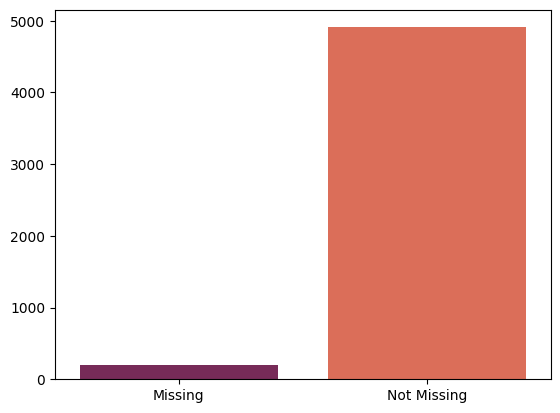

In [ ]:
# Plotting the missing values
sns.barplot(data=missing_bmi , palette="rocket")

### Dealling with Categorical and Numerical Variables

col_names() - This a function created to get the columns names that has categorical and numerical data separately

In [ ]:
def col_names(df):
    # Get categorical Variables
    cat_cols = [col for col in df.columns if df[col].dtypes not in ["int64", "float64"]]
    # Get numerical Variables
    num_cols = [col for col in df.columns if df[col].dtypes in ["int64", "float64"]]
    # Get Numerical but Categorical Variables
    num_but_cat = [col for col in num_cols if df[col].nunique() < 10]
    # Adding num_but_cat to cat_cols
    cat_cols = num_but_cat + cat_cols
    # num_but_cat removing from num_cols
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Numerical Cols: {num_cols} \nCategorical Cols: {cat_cols} \nNumerical but Categorical: {num_but_cat}")
    return num_cols, cat_cols

In [ ]:
numerical_cols, categorical_cols = col_names(stroke_data)

Numerical Cols: ['id', 'age', 'avg_glucose_level', 'bmi'] 
Categorical Cols: ['hypertension', 'heart_disease', 'stroke', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'] 
Numerical but Categorical: ['hypertension', 'heart_disease', 'stroke']


### Analysing Numerical Attributes

In [ ]:
stroke_data[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60


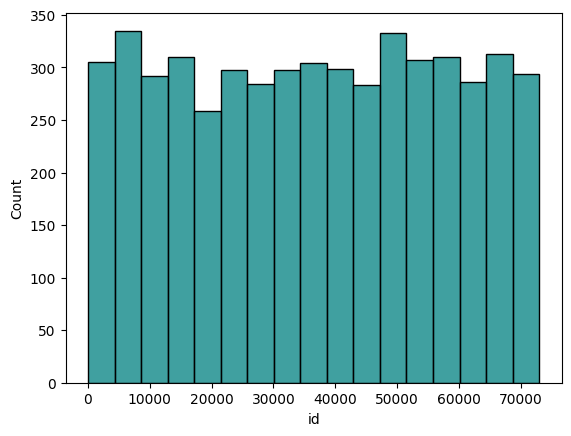

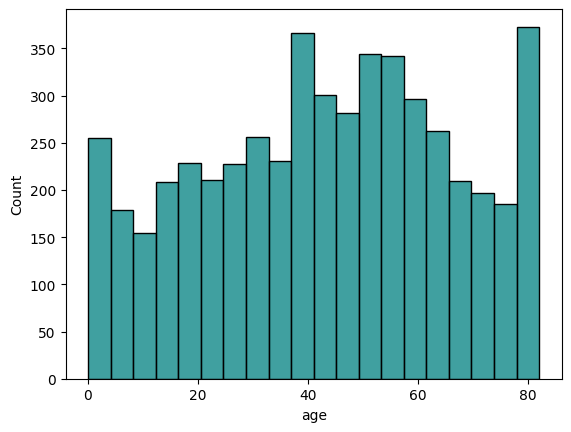

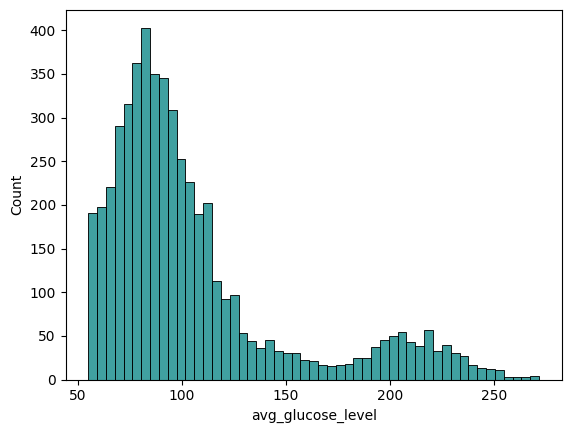

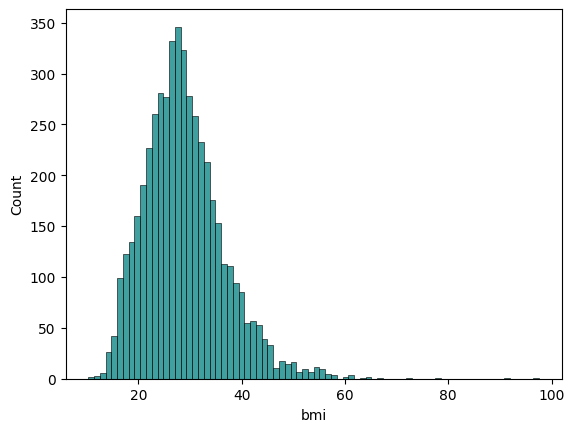

In [ ]:
# Plot Data for each attribute
for col in numerical_cols:
    sns.histplot(x=stroke_data[col], data=stroke_data, color="teal")
    plt.show(block=True)

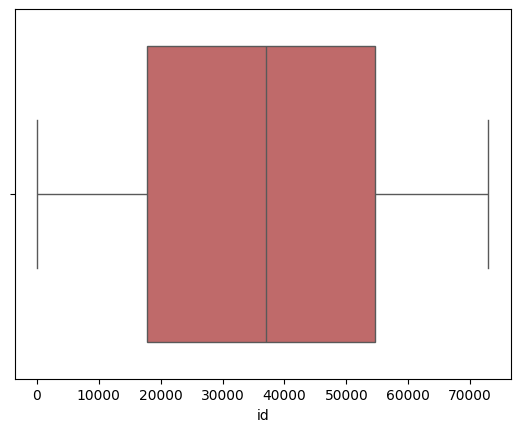

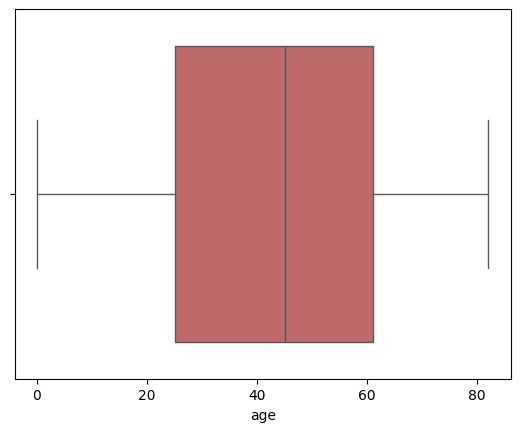

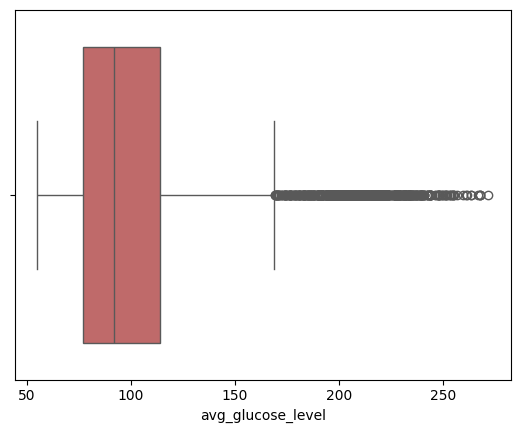

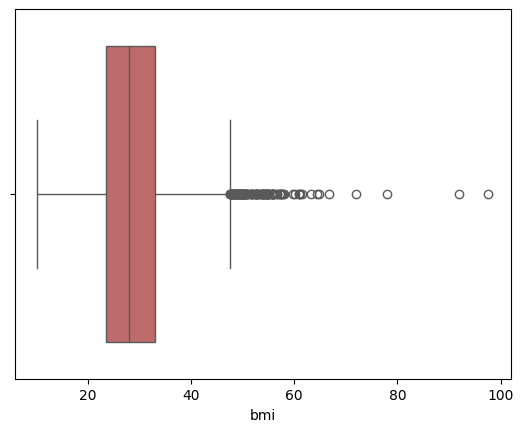

In [ ]:
# Checking for outliers
for col in numerical_cols:
    sns.boxplot(x=stroke_data[col], data=stroke_data, color="indianred")
    plt.show(block=True)

#### Checking for Outliers in Numerical Attributes

IQR (Interqartile range) is being used to check for outliers

check_outliers() -  This function will return the columns with outliers

In [ ]:
def check_outliers(df, numerical_cols, low_threshold=0.1, up_threshold=0.9):
    outlier_cols = []
    for col in numerical_cols:
        q1 = df[col].quantile(low_threshold)
        q3 = df[col].quantile(up_threshold)
        interquantile = q3 - q1
        up_limit = q3 + 1.5 * interquantile
        low_limit = q1 - 1.5 * interquantile
        if df[(df[col] > up_limit) | (df[col] < low_limit)].any(axis=None):
            outlier_cols.append(col)
    if not outlier_cols:
        print("There is no outliers")
    return outlier_cols

In [ ]:
outlier_cols = check_outliers(stroke_data, numerical_cols)

In [ ]:
outlier_cols

['bmi']

There are outliers only in "bmi" attribute

### Analysing Categorical Attributes

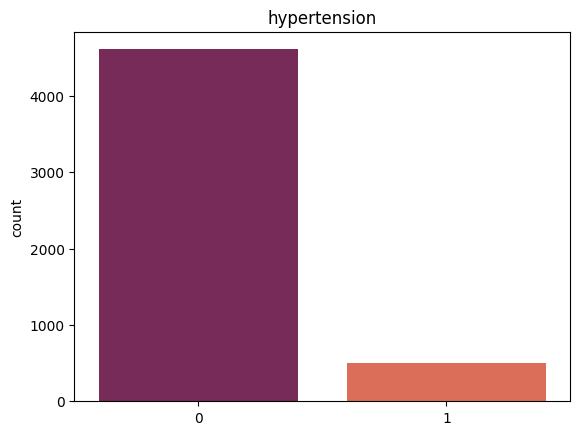

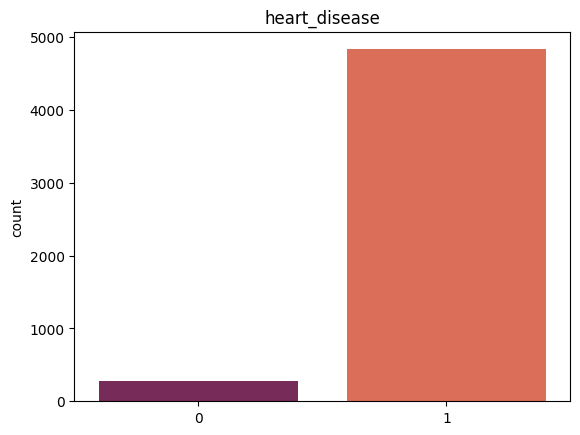

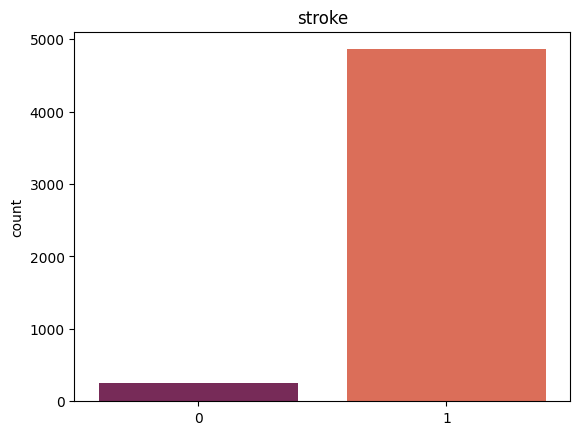

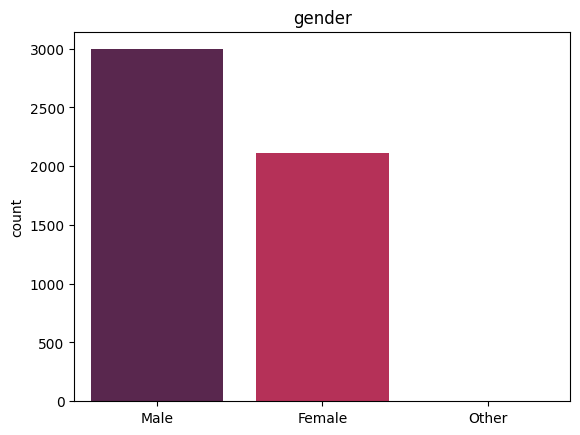

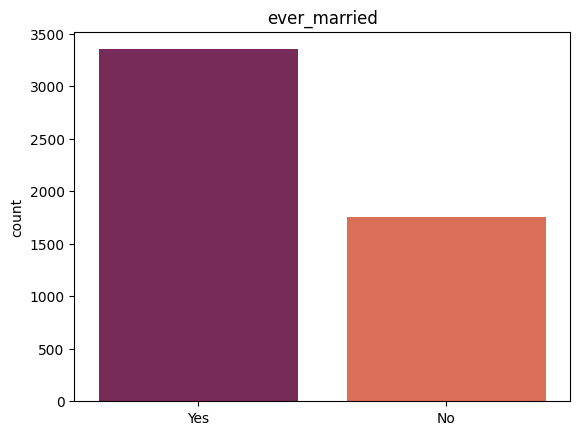

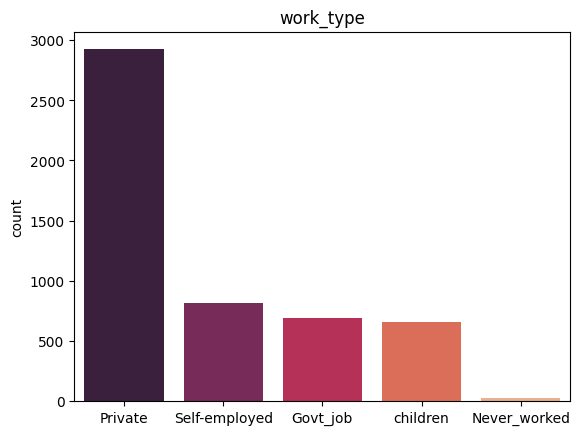

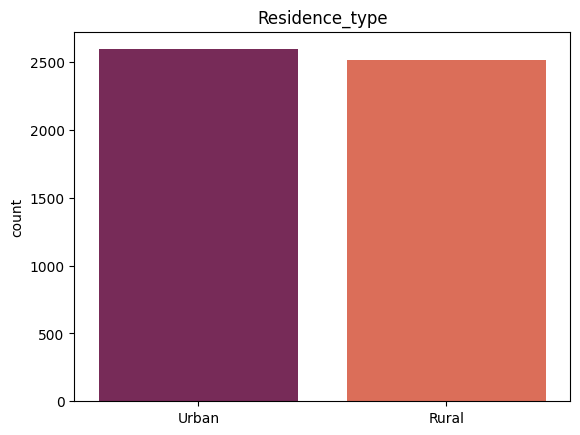

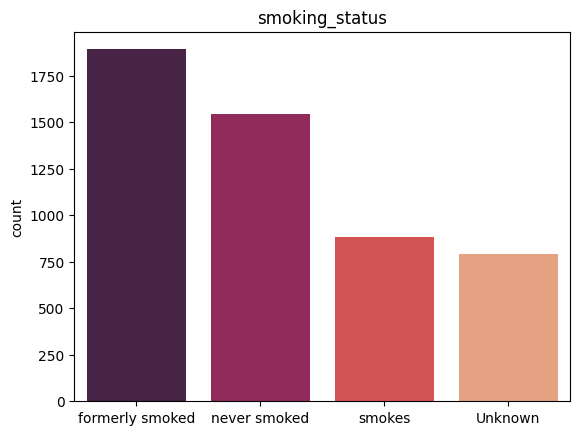

In [ ]:
for col in categorical_cols:
    sns.barplot(x = stroke_data[col].unique(), y = stroke_data[col].value_counts(), palette="rocket").set(title=col)
    plt.show(block=True)

### Analysing Target Variable

[Text(0.5, 1.0, 'Stroke')]

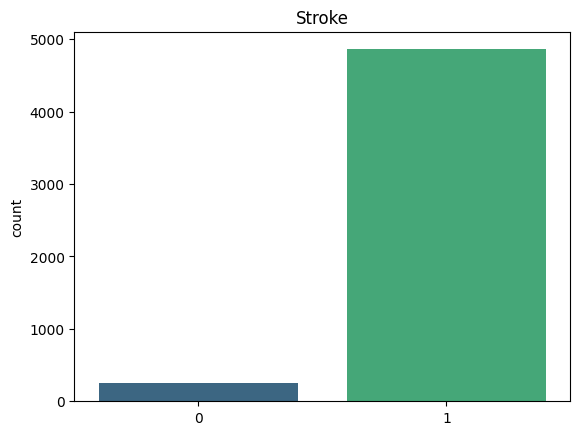

In [ ]:
# Get stroke counts and plot
stroke_data["stroke"].value_counts()
sns.barplot(x = stroke_data["stroke"].unique(), y = stroke_data["stroke"].value_counts(), palette="viridis").set(title="Stroke")

([<matplotlib.patches.Wedge at 0x7abc61e2d180>,
 [Text(-1.0871361453364168, 0.16773491438301516, '1'),
  Text(1.284797260350331, -0.19823218657998906, '0')],
 [Text(-0.5929833520016818, 0.09149177148164463, '95.1%'),
  Text(0.7906444679078961, -0.12198903789537788, '4.9%')])

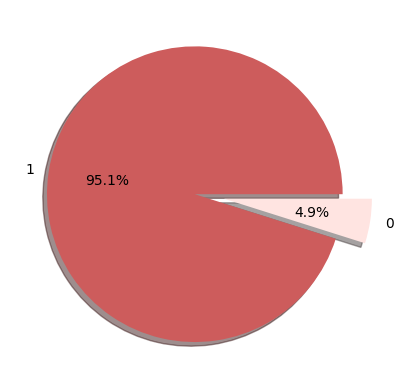

In [ ]:
# Plot as a percentage
plt.pie(stroke_data["stroke"].value_counts(), labels=[1,0], shadow=True, colors=["indianred", "mistyrose"], explode=(0,0.2), autopct="%1.1f%%")

Ratio of 1s is 95.1%

#### Check for correllation with numerical columns

<Axes: >

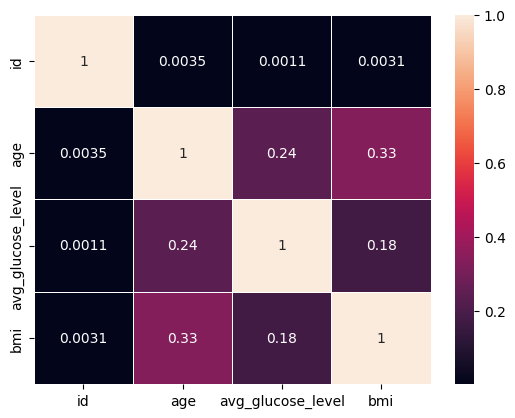

In [ ]:
sns.heatmap(stroke_data[numerical_cols].corr(), annot=True, linewidths=0.5,)

There are no highly correlated attributes


#### Target Variable vs Numerical Attributes

In [ ]:
for col in numerical_cols:
    print(stroke_data.groupby("stroke").agg({col:"mean"}), end="\n\n")

                  id
stroke              
0       36487.236371
1       37115.068273

              age
stroke           
0       41.971545
1       67.728193

        avg_glucose_level
stroke                   
0              104.795513
1              132.544739

              bmi
stroke           
0       28.823064
1       30.471292



According to the above resutls, we can see that the possibility of having a stroke increase with the increase of age, gluecose level and the bmi

#### Target Variable vs Categorical Attributes

In [ ]:
for col in categorical_cols:
    print(pd.DataFrame({"target_mean": stroke_data.groupby(col)["stroke"].mean()}), end="\n\n")

              target_mean
hypertension             
0                0.039679
1                0.132530

               target_mean
heart_disease             
0                 0.041787
1                 0.170290

        target_mean
stroke             
0               0.0
1               1.0

        target_mean
gender             
Female     0.047094
Male       0.051064
Other      0.000000

              target_mean
ever_married             
No               0.016505
Yes              0.065613

               target_mean
work_type                 
Govt_job          0.050228
Never_worked      0.000000
Private           0.050940
Self-employed     0.079365
children          0.002911

                target_mean
Residence_type             
Rural              0.045346
Urban              0.052003

                 target_mean
smoking_status              
Unknown             0.030440
formerly smoked     0.079096
never smoked        0.047569
smokes              0.053232



According to the above results,

- People with hypertension are more likely to have a stroke
- People with heart disease are more likely to have a stroke
- The probability of having a stroke is higher in men
- People who have been married are more likely to have a stroke
- People who are self-employed are more likely to have a stroke
- The probability of having a stroke is higher in urban life
- The probability of having a stroke is higher in formerly smoked people

### Feature Engineering (Data Preparation)

 #### Checking for duplicates

In [ ]:
stroke_data.duplicated().sum()

0

There are no duplicates found in the dataset

#### Filling Missing Values

Missing values are replaces by median: Often used when the missing values are numerical and the distribution of the variable is approximately normal. It is preferred when the distribution is skewed, as the median is less sensitive to outliers than the mean.

In [ ]:
stroke_data.fillna(stroke_data["bmi"].median(),inplace=True)

#### Applying Label Encoder
Label encoder was applied to binary columns (nunique values <2)

In [ ]:
binary_cols = [col for col in stroke_data.columns if stroke_data[col].dtype not in ["int64", "float64"] and stroke_data[col].nunique() == 2]

In [ ]:
binary_cols

['ever_married', 'Residence_type']

In [ ]:
le = LabelEncoder()

In [ ]:
for col in binary_cols:
    stroke_data[col] = le.fit_transform(stroke_data[col])

In [ ]:
stroke_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


#### Applying One-Hot Encoder

One-hot encoder will be applied to the attributes more than 2 categories

In [ ]:
ohe_cols = [col for col in stroke_data.columns if 2 < stroke_data[col].nunique() < 10]
ohe_cols

['gender', 'work_type', 'smoking_status']

In [ ]:
stroke_data = pd.get_dummies(stroke_data, columns=ohe_cols, drop_first=True)

In [ ]:
stroke_data.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,1,1,228.69,36.6,1,True,False,False,True,False,False,True,False,False
1,51676,61.0,0,0,1,0,202.21,28.1,1,False,False,False,False,True,False,False,True,False
2,31112,80.0,0,1,1,0,105.92,32.5,1,True,False,False,True,False,False,False,True,False
3,60182,49.0,0,0,1,1,171.23,34.4,1,False,False,False,True,False,False,False,False,True
4,1665,79.0,1,0,1,0,174.12,24.0,1,False,False,False,False,True,False,False,True,False


#### Dealing with Outliers

Using the IQR method, outliers were replaced with their upper and lower limits


In [ ]:
def replace_with_thresholds(df, col, low_threshold=0.1, up_threshold=0.9):
    q1 = df[col].quantile(low_threshold)
    q3 = df[col].quantile(up_threshold)
    interquantile = q3 - q1
    up_limit = q3 + 1.5 * interquantile
    low_limit = q1 - 1.5 * interquantile
    df.loc[(df[col] < low_limit), col] = low_limit
    df.loc[(df[col] > up_limit), col] = up_limit

In [ ]:
for col in outlier_cols:
    replace_with_thresholds(stroke_data, col)

In [ ]:
check_outliers(stroke_data, numerical_cols)

There is no outliers


[]

#### Feature Scalling

Min-Max Scaler was applied to "age", "bmi" and "avg_glucose_level"

In [ ]:
sc = MinMaxScaler()
stroke_data["age"] = sc.fit_transform(stroke_data[["age"]])
stroke_data["bmi"] = sc.fit_transform(stroke_data[["bmi"]])
stroke_data["avg_glucose_level"] = sc.fit_transform(stroke_data[["avg_glucose_level"]])


In [ ]:
stroke_data.head()

,id,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,0.816895,0,1,1,1,0.801265,0.464541,1,True,False,False,True,False,False,True,False,False
1,51676,0.743652,0,0,1,0,0.679023,0.314404,1,False,False,False,False,True,False,False,True,False
2,31112,0.975586,0,1,1,0,0.234512,0.392122,1,True,False,False,True,False,False,False,True,False
3,60182,0.597168,0,0,1,1,0.536008,0.425682,1,False,False,False,True,False,False,False,False,True
4,1665,0.963379,1,0,1,0,0.549349,0.241985,1,False,False,False,False,True,False,False,True,False


## Model Building

In [ ]:
y = stroke_data["stroke"]
X = stroke_data.drop(["stroke", "id"], axis=1)

Below classification models are used for predicting the stroke
- **Logistic Regression:** Uses sigmoid function (logistic function) to map predictions and their probabilities.
- **K-Neighbours Classifiers:** Assumes similarity between the new data and available case and put the new case  into the category that is most similar to the available category.
- **Decision Tree Classifiers:** Predicts the value of the target variable by learning simple decision rules inferred from the data features.
- **Random Forest Classifier:** Multiple decision trees are created using different random subsets of data and features.
- **Support Vector Machine:** Try to find the best hyperplane to separate two classes. Uses statistical approach.
- **Gradient Boosting Classifier**: Combines the predictions of multiple weak learners to create a single, more accurate strong learner.
- **XGB Classifier:** utilizes decision trees as base learners and employs regularization techniques to enhance model generalization.
- **LGM Classifier:** A gradient boosting framework that uses tree based learning algorithm. LightGBM grows tree vertically while other tree based learning algorithms grow trees horizontally.

In [ ]:
models = [("LR", LogisticRegression()),
          ("KNN", KNeighborsClassifier()),
          ("DecisionTree", DecisionTreeClassifier()),
          ("RF", RandomForestClassifier()),
          ("SVC", SVC()),
          ("GBM", GradientBoostingClassifier()),
          ("XGBoost", XGBClassifier())]

In [ ]:
for name, regressor in models:
    cv = cross_validate(regressor, X, y, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')

LR 
 Accuracy:0.9514677103718199 
 Recall:0.004081632653061224 
 Precision:0.2 
 F-Score:0.007999999999999998
KNN 
 Accuracy:0.9506849315068493 
 Recall:0.028163265306122447 
 Precision:0.5666666666666667 
 F-Score:0.05262994086523498
DecisionTree 
 Accuracy:0.9146771037181995 
 Recall:0.2122448979591837 
 Precision:0.17602602124341254 
 F-Score:0.1907576441507149
RF 
 Accuracy:0.949706457925636 
 Recall:0.012081632653061225 
 Precision:0.16666666666666666 
 F-Score:0.022128851540616244
SVC 
 Accuracy:0.9512720156555773 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
GBM 
 Accuracy:0.9483365949119372 
 Recall:0.0 
 Precision:0.0 
 F-Score:0.0
XGBoost 
 Accuracy:0.9418786692759296 
 Recall:0.06408163265306124 
 Precision:0.20427323103154302 
 F-Score:0.09664131161047815


#### Sampling

- SMOTE (Synthetic Minority Oversampling Technique) Sampling

SMOTE works by selecting examples that are close in the feature space, drawing a line between the examples in the feature space and drawing a new sample at a point along that line.

Specifically, a random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.

In [ ]:
sm = SMOTE()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
sum(y_train == 1)

203

In [ ]:
sum(y_train == 0)

3885

In [ ]:
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
sum(y_train_smote == 1)

3885

In [ ]:
sum(y_train_smote == 0)

3885

In [ ]:
# for name, regressor in models:
#     regressor.fit(X_train_smote, y_train_smote)
#     pre = regressor.predict(X_test)
#     print(f'{name}\nConfusion Matrix: \n{confusion_matrix(y_test, pre)}\n{classification_report(y_test, pre)}\n')

In [ ]:
for name, regressor in models:
    cv = cross_validate(regressor, X_train_smote, y_train_smote, cv=5, scoring=["accuracy", "f1", "recall", "precision"])
    print(f'{name} \n {"Accuracy"}:{cv["test_accuracy"].mean()} \n {"Recall"}:{cv["test_recall"].mean()} \n {"Precision"}:{cv["test_precision"].mean()} \n {"F-Score"}:{cv["test_f1"].mean()}')

LR 
 Accuracy:0.7998712998712999 
 Recall:0.84993564993565 
 Precision:0.7726326654717821 
 F-Score:0.8093465579788497
KNN 
 Accuracy:0.8728442728442729 
 Recall:0.9649935649935649 
 Precision:0.8149142045177464 
 F-Score:0.8835857792830428
DecisionTree 
 Accuracy:0.8601029601029602 
 Recall:0.8743886743886744 
 Precision:0.8505213898119843 
 F-Score:0.861813697566617
RF 
 Accuracy:0.9203346203346202 
 Recall:0.9583011583011583 
 Precision:0.8907462952594143 
 F-Score:0.923235755177228
SVC 
 Accuracy:0.8424710424710424 
 Recall:0.9178893178893179 
 Precision:0.7976359704291719 
 F-Score:0.8534508707152579
GBM 
 Accuracy:0.8552123552123552 
 Recall:0.9166023166023166 
 Precision:0.8165243304560477 
 F-Score:0.8633632185550993
XGBoost 
 Accuracy:0.9212355212355211 
 Recall:0.9353925353925353 
 Precision:0.9100621093806623 
 F-Score:0.9217775152513095


## References
- https://seaborn.pydata.org/generated/seaborn.barplot.html
- https://seaborn.pydata.org/tutorial/categorical.html
- https://www.w3schools.com/python/matplotlib_pie_charts.asp
- https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/